In [1]:
# Importing required libraries

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Loading dataset

In [2]:
ld=pd.read_csv("C://Users//acer//Desktop//1sem//python//do//Liver dataset//LiverDisease.csv")

In [5]:
# First few rows of dataset

In [6]:
ld.head(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,LiverPatient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
# Last few rows of dataset

In [8]:
ld.tail(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,LiverPatient
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [9]:
# some basic stats value

In [10]:
ld.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,LiverPatient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [11]:
# shape 

In [12]:
ld.shape

(583, 11)

In [13]:
# listing all columns

In [14]:
ld.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'AG', 'LiverPatient'],
      dtype='object')

In [15]:
# converting all column names in lower case

In [3]:
ld.columns=map(str.lower,ld.columns)

In [17]:
# info of dataset

In [18]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age             583 non-null int64
gender          583 non-null object
tb              583 non-null float64
db              583 non-null float64
alkphos         583 non-null int64
sgpt            583 non-null int64
sgot            583 non-null int64
tp              583 non-null float64
alb             583 non-null float64
ag              579 non-null float64
liverpatient    583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [19]:
# basic information about dataset in a dataframe

In [20]:
pd.DataFrame({"Total missing":ld.isna().sum(),"% missing":ld.isna().mean(),"data types":ld.dtypes,"Unique":ld.nunique()})

,Total missing,% missing,data types,Unique
age,0,0.000000,int64,72
gender,0,0.000000,object,2
tb,0,0.000000,float64,113
db,0,0.000000,float64,80
alkphos,0,0.000000,int64,263
sgpt,0,0.000000,int64,152
sgot,0,0.000000,int64,177
tp,0,0.000000,float64,58
alb,0,0.000000,float64,40
ag,4,0.006861,float64,69


In [21]:
# Data Analysis

In [22]:
# Missing values

In [4]:
ld.ag.fillna(ld.ag.median(),inplace=True)

In [24]:
ld.ag.isna().sum()

0

In [25]:
# Distribution of numerical features

In [26]:
num_col=ld.select_dtypes(include=["int64","float64"]).columns.tolist()

In [27]:
num_col=ld[num_col]

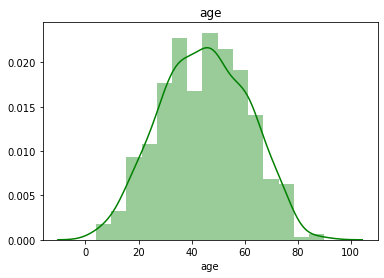

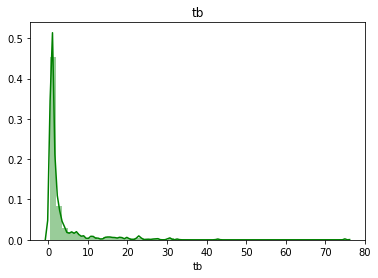

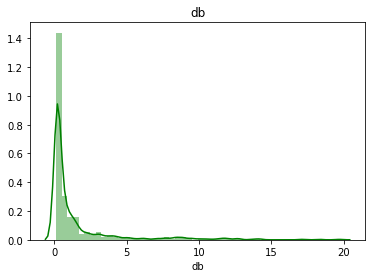

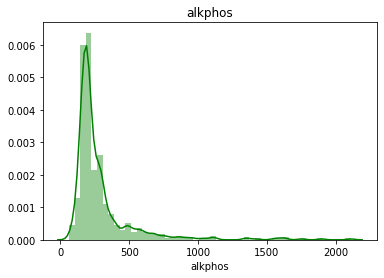

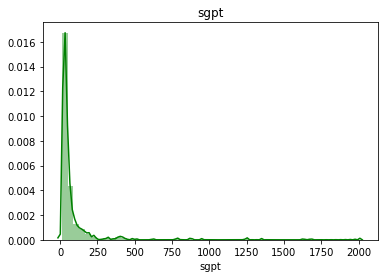

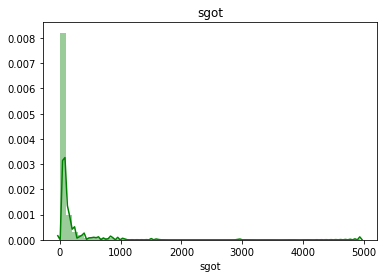

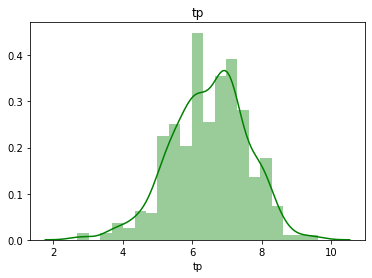

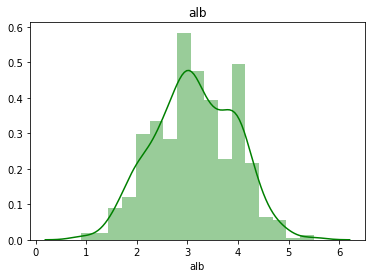

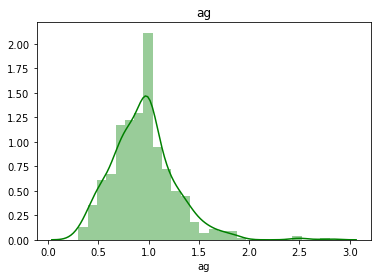

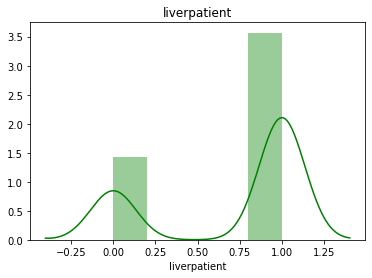

In [28]:
for feature in num_col.columns:
    data=num_col.copy()
    sns.distplot(data[feature],color="green")
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [29]:
# Individual histogram

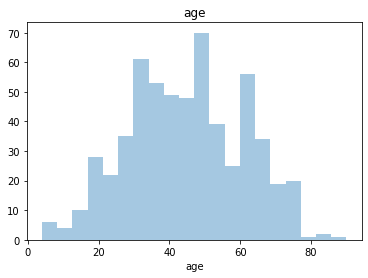

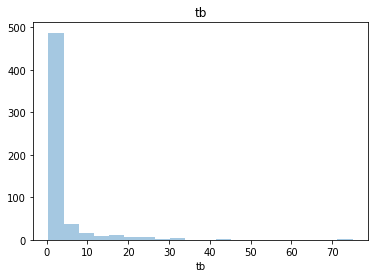

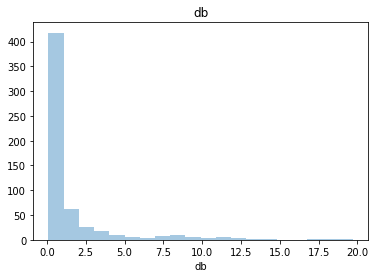

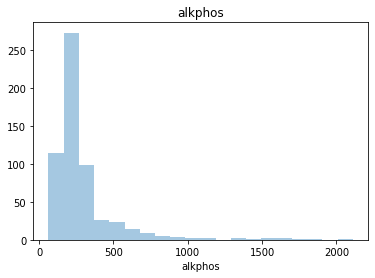

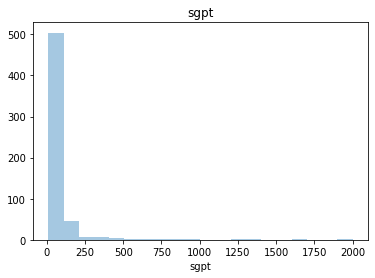

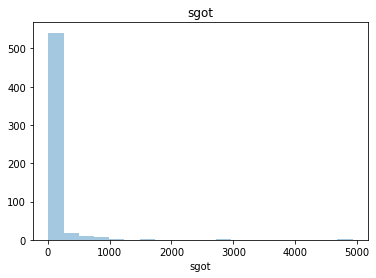

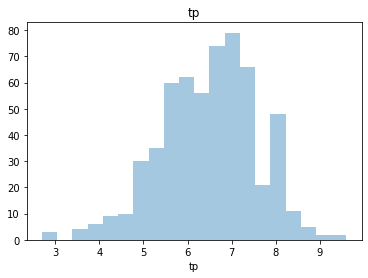

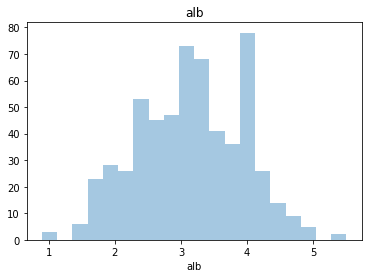

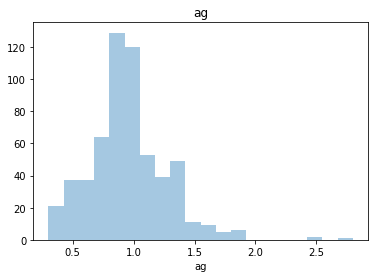

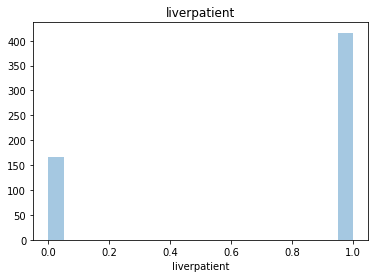

In [30]:
for feature in num_col.columns:
    data=num_col.copy()
    sns.distplot(data[feature], kde=False, bins=20)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [31]:
# Bivariate analysis

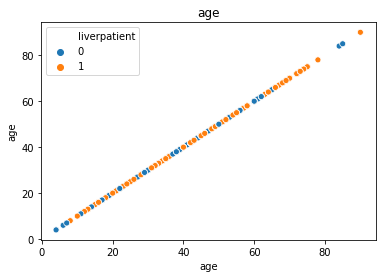

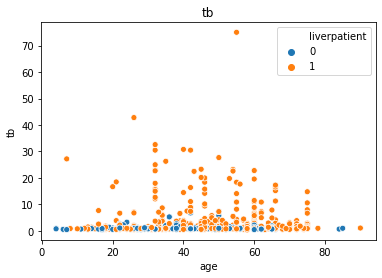

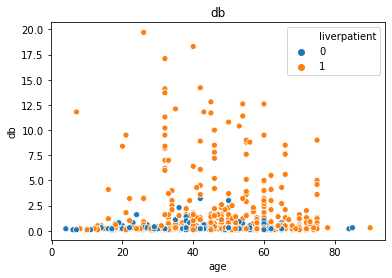

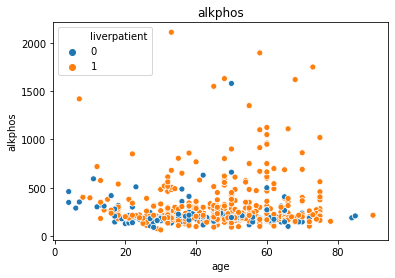

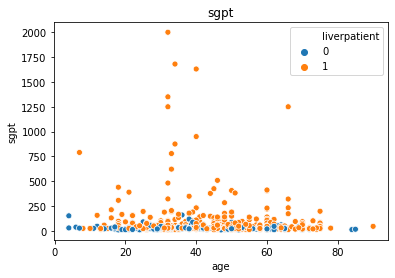

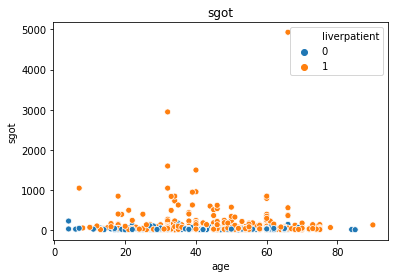

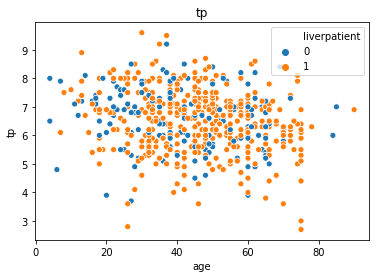

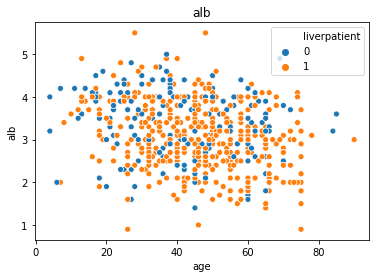

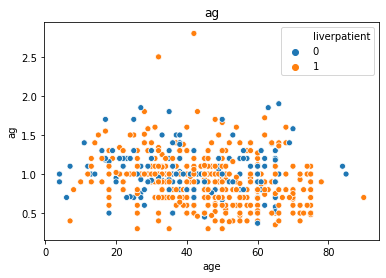

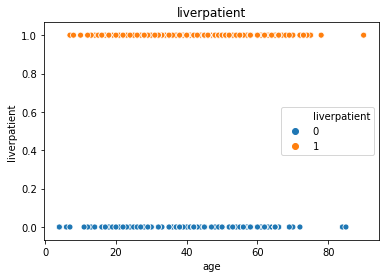

In [32]:
for feature in num_col.columns:
    data=num_col.copy()
    sns.scatterplot(x="age",y=feature,hue="liverpatient",data=data)
    plt.xlabel("age")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:
# Line plot 

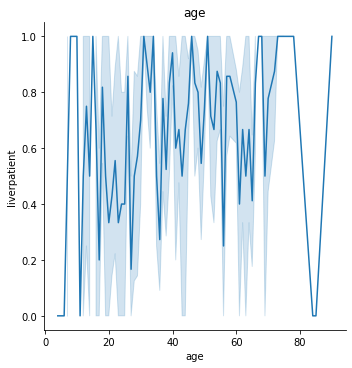

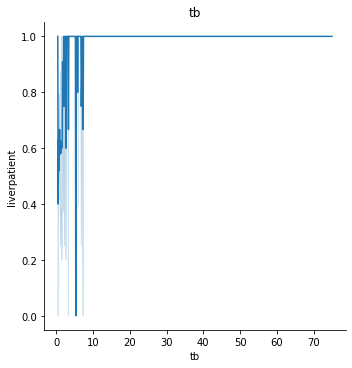

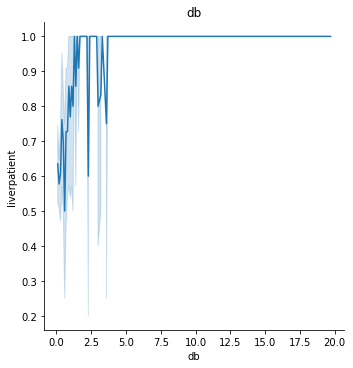

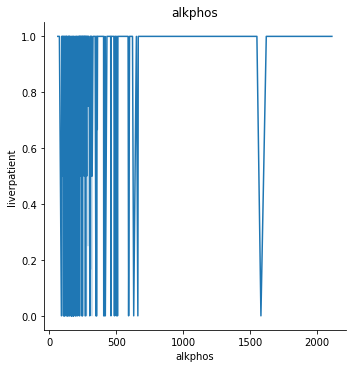

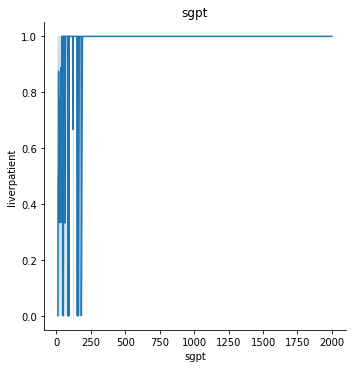

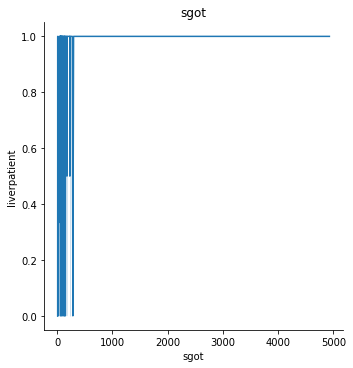

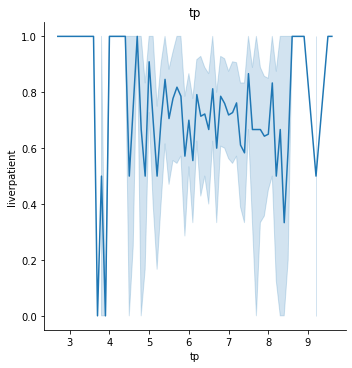

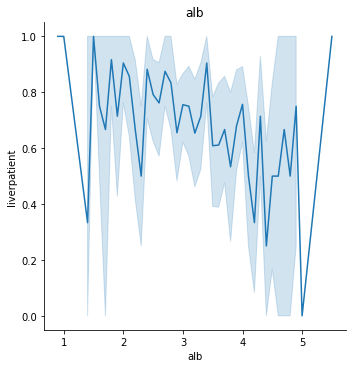

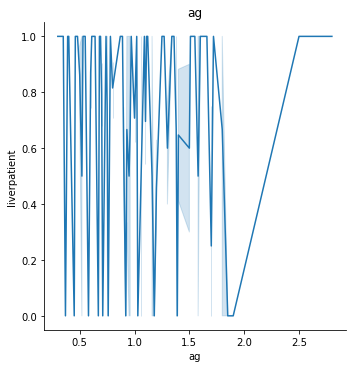

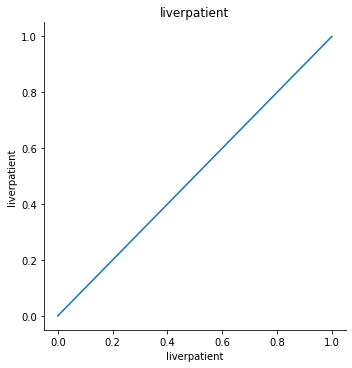

In [38]:
for feature in num_col.columns:
    data=num_col.copy()
    sns.relplot(x=feature,y="liverpatient",kind="line", data=data)
    plt.xlabel(feature)
    plt.ylabel("liverpatient")
    plt.title(feature)
    plt.show()

In [ ]:
# box plot for categorical variable

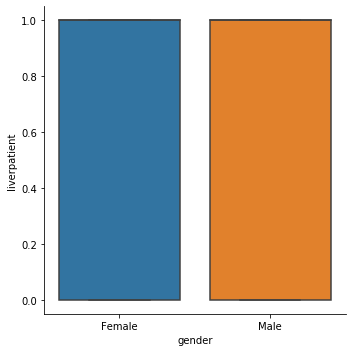

In [40]:
sns.catplot(x="gender", y="liverpatient", kind="box", data=ld)

In [ ]:
# Group by fn

In [51]:
ld.groupby(("gender"),as_index=False).mean()

,gender,age,tb,db,alkphos,sgpt,sgot,tp,alb,ag,liverpatient
0,Female,43.133803,2.322535,0.989437,302.338028,54.239437,69.042254,6.653521,3.273239,0.948732,0.647887
1,Male,45.265306,3.613152,1.646032,286.789116,89.238095,123.070295,6.428345,3.099546,0.946372,0.734694


In [ ]:
# heatmap

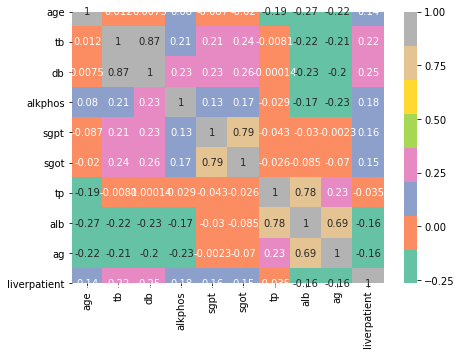

In [6]:
plt.figure(figsize=(7,5))
sns.heatmap(ld.corr(),annot=True,cmap="Set2")

In [7]:
ld.head(2)

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,ag,liverpatient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1


In [ ]:
# We need to encode gender column and scale down some cols before applying ml algo

In [8]:
le=LabelEncoder()

In [9]:
ld["gender"]=le.fit_transform(ld["gender"])

In [ ]:
# Lets scale down some cols

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
standardscaler = StandardScaler()
cols = ["age","tb","db","alkphos","sgpt","sgot"]
ld[cols] = standardscaler.fit_transform(ld[cols])

In [ ]:
# lets look at the dataset

In [14]:
ld.sample(3)

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,ag,liverpatient
558,0.386615,1,0.113020,0.361319,-0.064172,1.651213,0.762423,7.5,4.0,1.1,1
71,1.870300,0,-0.402760,-0.458327,-0.422595,-0.332743,-0.280288,4.4,1.8,0.6,1
224,1.561199,1,-0.257697,-0.351417,0.450805,-0.135444,-0.228325,5.7,3.1,1.1,1


In [ ]:
# Lets divide dataset into dependent and independent variable

In [15]:
y = ld['liverpatient']
X = ld.drop(['liverpatient'], axis = 1)

In [ ]:
# Lets apply ml algo 

In [18]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,25):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [ ]:
# Visualizing result

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

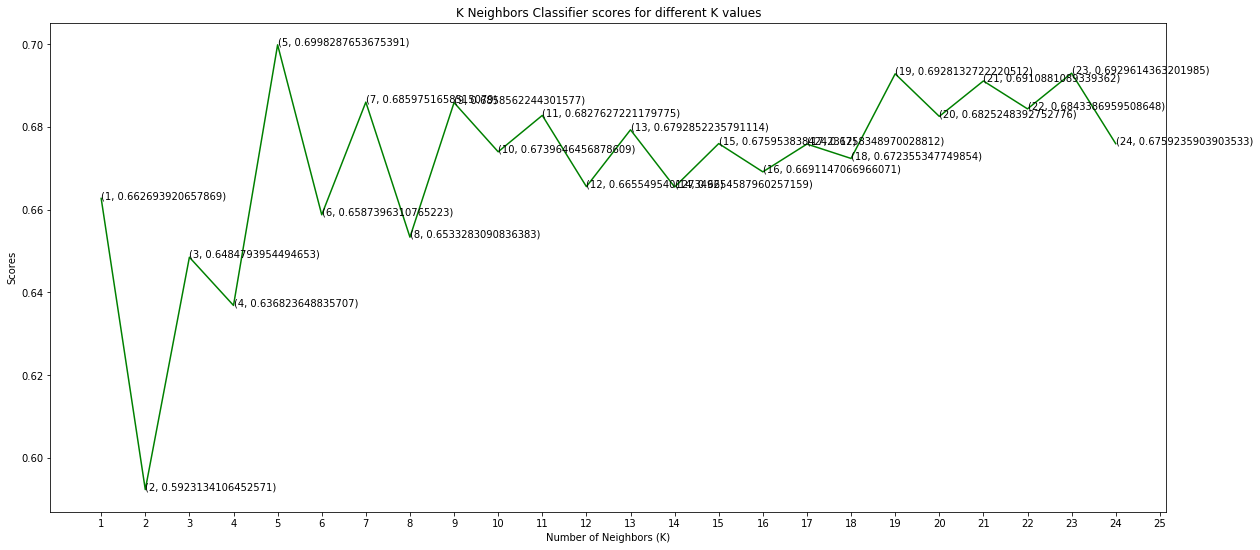

In [23]:
plt.figure(figsize=(20,9))
plt.plot([k for k in range(1, 25)], knn_scores, color = 'green')
for i in range(1,25):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 26)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
# Lets apply best K value

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.6998287653675391

In [ ]:
# Lets apply random forest

In [27]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.6638525741589507

In [ ]:
# Lets apply other ml algo

In [28]:
bc=BaggingClassifier()
score=cross_val_score(bc,X,y,cv=10)
score.mean()

0.6705425164313471

In [29]:
abc=AdaBoostClassifier()
score=cross_val_score(abc,X,y,cv=10)
score.mean()

0.6874342489772063

In [30]:
dt=DecisionTreeClassifier()
score=cross_val_score(dt,X,y,cv=10)
score.mean()

0.6347134639638253

In [ ]:
# KNN has given good prediction as compared with other models